In [1]:
import pandas as pd
#Importing all required libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

#Plotting Plots
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
import pandas as pd
df = pd.read_csv("/Users/Arjun D H/Documents/YouTube_statistics.csv",engine='python',encoding='utf-8')

In [3]:
df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [4]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [5]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               561
dtype: int64

In [6]:
df.shape

(37352, 16)

In [8]:
title= df['title'].dropna()

In [9]:
title=title.tolist() 

In [10]:
print(len(title))

37352


In [11]:
def findtitle(title):
    requiredtitle = []
    for i in title:
        if(title in i):
            title.append(i)
    return(len(title)) 

In [12]:
findtitle("Sharry Mann: Cute Munda ( Song Teaser) | Parmi...")

49

In [13]:
top5title = df['title'].value_counts()
top5title[0:5]

Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures                        19
Sanju | Official Teaser | Ranbir Kapoor | Rajkumar Hirani                                           16
Nandhini | Today @ 9 pm | Sun TV                                                                    15
Sanju | Official Trailer | Ranbir Kapoor | Rajkumar Hirani | Releasing on 29th June                 14
Golak Bugni Bank Te Batua Full Movie (HD) | Harish Verma | Simi Chahal | Superhit Punjabi Movies    14
Name: title, dtype: int64

In [14]:
top10channel_title = df['channel_title'].value_counts()
top10channel_title[0:10]

VikatanTV           284
etvteluguindia      282
Flowers Comedy      270
ETV Plus India      253
SAB TV              244
RadaanMedia         243
mallemalatv         238
SET India           238
ETV Jabardasth      234
Vijay Television    231
Name: channel_title, dtype: int64

In [15]:
top10tags = df['tags'].value_counts()
top10tags[0:10]

[none]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          1381
etv Plus|"etv comedy show"|"3 Idiots"|"anchor ravi"|"Chinnadana Neekosam"|"express raja"|"hungama"|"Kick"|"Nandini Vs Nandini"|"Pataas"|"jabardasth"|"extra jabardasth"|"naga babu"|"roja"|"anchor anasuya"|"pove pora"|"comedy short films"|"yadamma raju"|"chalaki chanti"|"sudigali sudeer"|"anchor suma"|"comedy show"|"anchor sreemukhi"|"comedy skits in telugu"|"telugu comedy tracks"|"racha ravi"|"allare allari"|"sardaga kasepu"|"ejunction"|"anchor pradeep"|"pataas punches"|"anchor v

In [16]:
top5channel_title = df['channel_title'].value_counts()
top5channel_title = top5channel_title[0:5]
print(type(top5channel_title))

<class 'pandas.core.series.Series'>


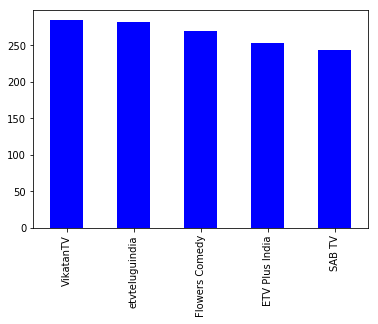

In [17]:
top5channel_title.plot.bar(stacked=True, colormap='winter')

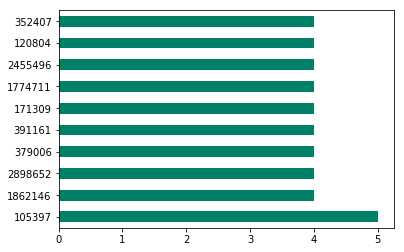

In [18]:
df['views'].value_counts()[:10].plot(kind='barh',colormap='summer')

In [19]:
top5likes = df['likes'].value_counts()
top5likes[0:5]

0      781
253     23
57      21
227     21
289     21
Name: likes, dtype: int64

In [21]:
difdescription= df['description'].dropna()

In [22]:
difdescription.value_counts()

Subscribers Link: http://bit.ly/2qb69dZ\n\nConnect with Radaan Media online: http://bit.ly/2rGVWHT\n\nVisit our WEBSITE: https://www.radaan.tv\n\nLike us on FACEBOOK: http://bit.ly/2qLmgTm\n\nFollow us on TWITTER: http://bit.ly/2r8gZGD\n\nVAANI RANI SYNOPSIS\nTwin sister’s Vaani and Rani get married to an elder and younger brother of the same family respectively. Vaani the elder one is a well read attorney and the younger one Rani is a failure in education with not even going beyond 10thclass. Though both have extreme ideologies of life Rani is a favorite among neighbors with her uncanny innocent approach. Vaani is a roaring lion at the court room who is looked up as a role model to so many upcoming lawyers for her advocating abilities, whereas Rani is a well versed home maker. Not only with the sisters remain with this extremity but even their respective husband’s share the same dose of luck….Vaani is a mother of 2 children and Rani has three children who are in their teens. Volcanoes

# Analysis of Title Data

In [23]:
title= df['title'].dropna()

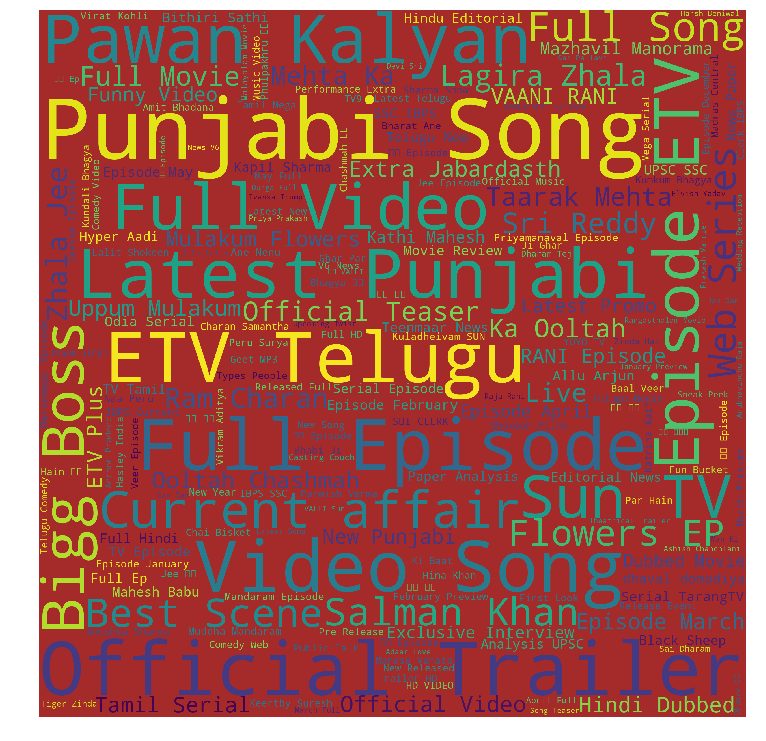

In [24]:
from wordcloud import WordCloud, STOPWORDS

def showWordCloud(data):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords = STOPWORDS,
                         background_color = 'brown',
                         width = 2500,
                         height = 2500
                         ).generate(cleaned_word)
    plt.figure(1,figsize = (13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

showWordCloud(title)

In [25]:
title = title.tolist()

In [26]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [28]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(title))

print(data_words[:1])

[['sharry', 'mann', 'cute', 'munda', 'song', 'teaser', 'parmish', 'verma', 'releasing', 'on', 'november']]


In [29]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['sharry_mann', 'cute_munda', 'song', 'teaser', 'parmish_verma', 'releasing', 'on', 'november']


In [30]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
def lemmatization(texts, allowed_postags=['NOUN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [31]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN'])
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:4])

[['cute_munda', 'song', 'teaser', 'parmish_verma', 'november'], ['यग'], ['star', 'allu_arjun', 'chaysam_wedding', 'reception'], ['tamil', 'english']]


In [32]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]]


In [33]:
id2word[0]

'cute_munda'

In [34]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:3]]

[[('cute_munda', 1),
  ('november', 1),
  ('parmish_verma', 1),
  ('song', 1),
  ('teaser', 1)],
 [('यग', 1)],
 [('allu_arjun', 1), ('chaysam_wedding', 1), ('reception', 1), ('star', 1)]]

# Build LDA Model for Title Data

In [35]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [36]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.074*"trailer" + 0.059*"movie" + 0.043*"tv" + 0.038*"tamil" + '
  '0.031*"promo" + 0.018*"hd" + 0.015*"season" + 0.015*"scene" + '
  '0.013*"priyamanaval" + 0.012*"sun"'),
 (1,
  '0.038*"review" + 0.035*"preview" + 0.026*"current_affair" + 0.023*"raja" + '
  '0.021*"bigg_boss" + 0.015*"reddy" + 0.015*"clerk_ibps" + 0.012*"type" + '
  '0.012*"police" + 0.012*"zee"'),
 (2,
  '0.121*"video" + 0.121*"song" + 0.038*"khan" + 0.021*"part" + 0.020*"girl" + '
  '0.015*"gujarati" + 0.015*"music" + 0.008*"interview" + 0.008*"bollywood" + '
  '0.008*"bangla"'),
 (3,
  '0.150*"episode" + 0.063*"telugu" + 0.046*"comedy" + 0.037*"etv" + '
  '0.033*"news" + 0.023*"india" + 0.018*"salman" + 0.016*"show" + 0.015*"jee" '
  '+ 0.013*"love"'),
 (4,
  '0.172*"june" + 0.044*"teaser" + 0.020*"ep" + 0.015*"day" + 0.012*"kaala" + '
  '0.012*"sri" + 0.012*"serial_tarangtv" + 0.012*"rajinikanth_pa" + '
  '0.012*"odia" + 0.010*"kalyan"')]


In [37]:
# Compute Model Perplexity and Coherence Score

In [38]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.889774850986946

Coherence Score:  0.6272822764790977


In [39]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.189004 -0.267542       1        1  24.346972
3      0.260353  0.228859       2        1  24.158207
2     -0.190415  0.151888       3        1  19.615753
4     -0.160395 -0.141440       4        1  16.882843
1     -0.098547  0.028235       5        1  14.996231, topic_info=      Category         Freq             Term        Total  loglift  logprob
12698  Default  4304.000000             june  4304.000000  30.0000  30.0000
45     Default  5351.000000          episode  5351.000000  29.0000  29.0000
23     Default  3519.000000            video  3519.000000  28.0000  28.0000
3      Default  3501.000000             song  3501.000000  27.0000  27.0000
64     Default  2673.000000          trailer  2673.000000  26.0000  26.0000
43     Default  2237.000000           telugu  2237.000000  25.0000  25.0000
76     Default  2136.000000            movie  2136.000000  24.0000  24.0000
210    Default  1657.000000           comedy  1657.000000  23.0000  23.0000
84     Default  1558.000000               tv  1558.000000  22.0000  22.0000
4      Default  1101.000000           teaser  1101.000000  21.0000  21.0000
11     Default  1353.000000            tamil  1353.000000  20.0000  20.0000
80     Default  1311.000000              etv  1311.000000  19.0000  19.0000
35     Default  1098.000000             khan  1098.000000  18.0000  18.0000
87     Default  1171.000000             news  1171.000000  17.0000  17.0000
448    Default   849.000000           review   849.000000  16.0000  16.0000
104    Default  1112.000000            promo  1112.000000  15.0000  15.0000
302    Default   781.000000          preview   781.000000  14.0000  14.0000
46     Default   827.000000            india   827.000000  13.0000  13.0000
424    Default   572.000000   current_affair   572.000000  12.0000  12.0000
139    Default   616.000000             part   616.000000  11.0000  11.0000
1732   Default   514.000000             raja   514.000000  10.0000  10.0000
133    Default   589.000000             girl   589.000000   9.0000   9.0000
296    Default   652.000000               hd   652.000000   8.0000   8.0000
62     Default   638.000000           salman   638.000000   7.0000   7.0000
150    Default   501.000000               ep   501.000000   6.0000   6.0000
33     Default   459.000000        bigg_boss   459.000000   5.0000   5.0000
327    Default   555.000000             show   555.000000   4.0000   4.0000
297    Default   546.000000           season   546.000000   3.0000   3.0000
1057   Default   538.000000            scene   538.000000   2.0000   2.0000
3403   Default   522.000000              jee   522.000000   1.0000   1.0000
...        ...          ...              ...          ...      ...      ...
33      Topic5   458.717407        bigg_boss   459.552460   1.8956  -3.8785
817     Topic5   337.828735            reddy   338.653076   1.8949  -4.1844
11701   Topic5   323.419373       clerk_ibps   324.240356   1.8948  -4.2280
59      Topic5   271.979370             type   272.793060   1.8944  -4.4012
1219    Topic5   270.520264           police   271.333557   1.8944  -4.4066
214     Topic5   220.878555          actress   221.695648   1.8937  -4.6093
9195    Topic5   260.604156              zee   261.595856   1.8936  -4.4439
2009    Topic5   183.063766            phone   183.882797   1.8929  -4.7971
514     Topic5   175.165176           mother   175.993347   1.8927  -4.8412
2336    Topic5   165.522766         superhit   166.342255   1.8924  -4.8978
1062    Topic5   160.879990           people   161.690857   1.8923  -4.9263
4817    Topic5   160.125824           result   160.943954   1.8923  -4.9310
3568    Topic5   150.404129        girliyapa   151.220566   1.8920  -4.9936
650     Topic5   145.240173          hearing   146.135040   1.8912  -5.0285
3511    Topic5   128.978134            other   129.788879   1.8911  -5.1473
2421   

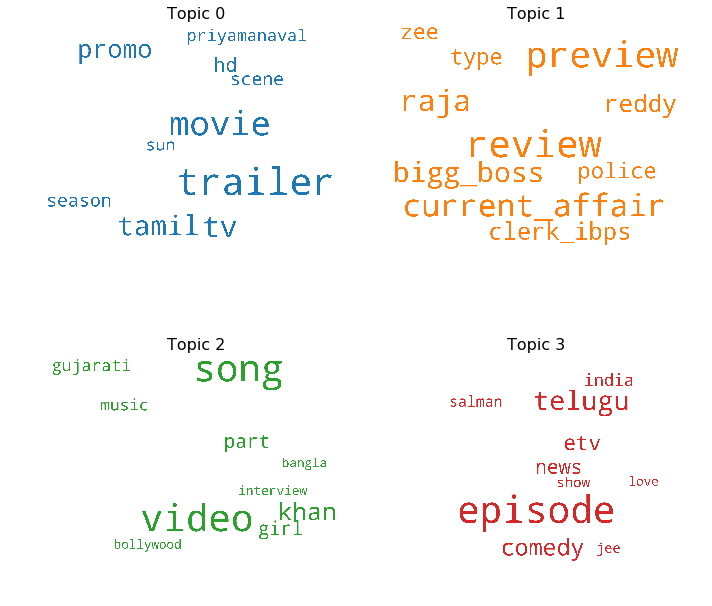

In [40]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Hyperparameter Tuning - Number of Topics and Alpha

In [41]:
# compute coherence value at various values of alpha and num_topics
def compute_coherence_values(dictionary, corpus, texts, num_topics_range, alpha_range):
    
    coherence_values = []
    model_list = []
    for alpha in alpha_range:
        for num_topics in num_topics_range:
            lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics, 
                                               alpha=alpha,
                                               per_word_topics=True)
            model_list.append(lda_model)
            coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append((alpha, num_topics, coherencemodel.get_coherence()))
        

    return model_list, coherence_values

In [42]:
num_topics_range = [2, 6, 10, 15, 20]
alpha_range = [0.01, 0.1, 0.001]
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        num_topics_range=num_topics_range, 
                                                        alpha_range=alpha_range)

In [43]:
coherence_df = pd.DataFrame(coherence_values, columns=['alpha', 'num_topics', 'coherence_value'])
coherence_df

,alpha,num_topics,coherence_value
0,0.010,2,0.535539
1,0.010,6,0.589545
2,0.010,10,0.617790
3,0.010,15,0.645526
4,0.010,20,0.657865
5,0.100,2,0.474156
6,0.100,6,0.572809
7,0.100,10,0.635410
8,0.100,15,0.661142
9,0.100,20,0.676168


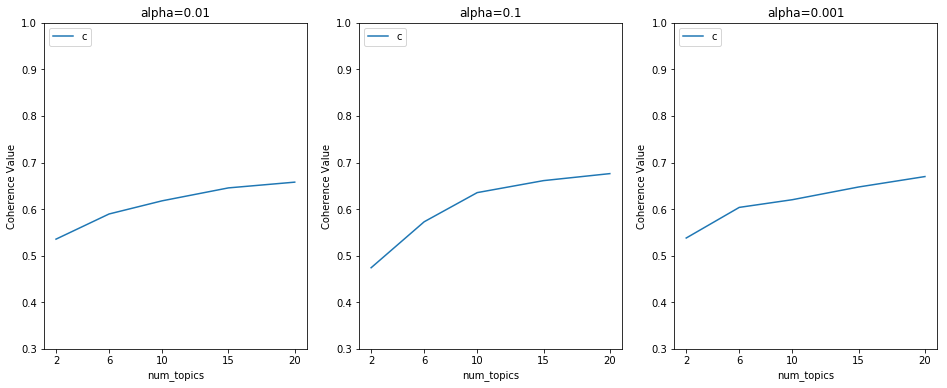

In [44]:
def plot_coherence(coherence_df, alpha_range, num_topics_range):
    plt.figure(figsize=(16,6))

    for i, val in enumerate(alpha_range):

        # subplot 1/3/i
        plt.subplot(1, 3, i+1)
        alpha_subset = coherence_df[coherence_df['alpha']==val]

        plt.plot(alpha_subset["num_topics"], alpha_subset["coherence_value"])
        plt.xlabel('num_topics')
        plt.ylabel('Coherence Value')
        plt.title("alpha={0}".format(val))
        plt.ylim([0.30, 1])
        plt.legend('coherence value', loc='upper left')
        plt.xticks(num_topics_range)

plot_coherence(coherence_df, alpha_range, num_topics_range)

In [45]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.1,
                                           per_word_topics=True)

In [46]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.185*"tv" + 0.161*"tamil" + 0.053*"sun" + 0.051*"serial" + 0.047*"flower" '
  '+ 0.038*"pm" + 0.030*"serial_அழக" + 0.027*"zee" + 0.025*"today" + '
  '0.022*"revathy_vision"'),
 (1,
  '0.206*"review" + 0.054*"actress" + 0.038*"opinion" + 0.035*"yoyo" + '
  '0.034*"tip" + 0.030*"wedding" + 0.030*"prashanth" + 0.021*"friday_poster" + '
  '0.019*"peek" + 0.018*"ടട"'),
 (2,
  '0.248*"trailer" + 0.097*"khan" + 0.094*"news" + 0.058*"salman" + '
  '0.040*"bigg_boss" + 0.024*"nandini" + 0.024*"race" + 0.024*"suntv" + '
  '0.023*"hai" + 0.021*"bollywood"'),
 (3,
  '0.373*"movie" + 0.094*"scene" + 0.040*"interview" + 0.034*"ram" + '
  '0.032*"star" + 0.029*"keerthy_suresh" + 0.027*"anupama_parameswaran" + '
  '0.024*"mahanati" + 0.021*"harsh_beniwal" + 0.015*"studio"'),
 (4,
  '0.249*"promo" + 0.074*"sri" + 0.049*"vishal" + 0.033*"yuvan_shankar" + '
  '0.033*"raja_mithran" + 0.031*"cash" + 0.028*"dhee" + 0.027*"பப" + '
  '0.025*"super_entertainer" + 0.023*"family"'),
 (5,
  '0.138*"show"

In [47]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -14.98184869592381

Coherence Score:  0.5935752812772


In [48]:
coherence_model_lda.get_coherence_per_topic()

[0.5893679079475057,
 0.6261195852126756,
 0.6043077185052539,
 0.5270867031745164,
 0.5885927081387484,
 0.5884316867815796,
 0.5165037789613897,
 0.6240725857038976,
 0.6254992035316088,
 0.5644023939289086,
 0.6453651645038903,
 0.5783702931858941,
 0.6208134427525966,
 0.5857840947357599,
 0.6189119520937745]

In [49]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
8      0.206389 -0.339522       1        1  9.777864
2      0.295489  0.229211       2        1  9.627628
0     -0.001393 -0.030140       3        1  8.022745
7     -0.048665 -0.002423       4        1  7.864874
3     -0.074986  0.011067       5        1  6.728768
9     -0.038353 -0.007600       6        1  6.677110
11     0.082047 -0.097434       7        1  6.486116
5     -0.095093  0.020825       8        1  6.172257
14    -0.026784 -0.014379       9        1  6.137650
6     -0.066873  0.006826      10        1  6.124372
12    -0.089535  0.017947      11        1  5.798832
4     -0.091126  0.018786      12        1  5.506913
1     -0.095410  0.020980      13        1  5.457062
13    -0.086194  0.016395      14        1  4.904118
10     0.130484  0.149461      15        1  4.713690, topic_info=      Category         Freq             Term        Total  loglift  logprob
45     Default  5191.000000          episode  5191.000000  30.0000  30.0000
12698  Default  4247.000000             june  4247.000000  29.0000  29.0000
76     Default  3712.000000            movie  3712.000000  28.0000  28.0000
23     Default  4259.000000            video  4259.000000  27.0000  27.0000
3      Default  4237.000000             song  4237.000000  26.0000  26.0000
64     Default  3533.000000          trailer  3533.000000  25.0000  25.0000
43     Default  2960.000000           telugu  2960.000000  24.0000  24.0000
104    Default  2030.000000            promo  2030.000000  23.0000  23.0000
84     Default  2194.000000               tv  2194.000000  22.0000  22.0000
210    Default  1899.000000           comedy  1899.000000  21.0000  21.0000
448    Default  1662.000000           review  1662.000000  20.0000  20.0000
4      Default  1724.000000           teaser  1724.000000  19.0000  19.0000
11     Default  1906.000000            tamil  1906.000000  18.0000  18.0000
80     Default  1734.000000              etv  1734.000000  17.0000  17.0000
327    Default  1262.000000             show  1262.000000  16.0000  16.0000
46     Default  1327.000000            india  1327.000000  15.0000  15.0000
35     Default  1376.000000             khan  1376.000000  14.0000  14.0000
87     Default  1461.000000             news  1461.000000  13.0000  13.0000
101    Default   944.000000              day   944.000000  12.0000  12.0000
139    Default   857.000000             part   857.000000  11.0000  11.0000
1057   Default   935.000000            scene   935.000000  10.0000  10.0000
150    Default   809.000000               ep   809.000000   9.0000   9.0000
296    Default   763.000000               hd   763.000000   8.0000   8.0000
3403   Default   838.000000              jee   838.000000   7.0000   7.0000
133    Default   754.000000             girl   754.000000   6.0000   6.0000
1732   Default   792.000000             raja   792.000000   5.0000   5.0000
302    Default   729.000000          preview   729.000000   4.0000   4.0000
62     Default   827.000000           salman   827.000000   3.0000   3.0000
858    Default   719.000000             love   719.000000   2.0000   2.0000
297    Default   639.000000           season   639.000000   1.0000   1.0000
...        ...          ...              ...          ...      ...      ...
51     Topic15   362.836426            music   364.313995   3.0506  -2.9557
1054   Topic15   126.963692     humble_music   128.441254   3.0431  -4.0058
168    Topic15   116.482338   paper_analysis   117.959892   3.0421  -4.0919
167    Topic15   111.278221             ibps   112.755775   3.0415  -4.1376
32     Topic15   110.165535          reality   111.643089   3.0414  -4.1477
166    Topic15   102.933556  current_affairs   104.411110   3.0404  -4.2156
2186   Topic15    71.996262     relationship    73.473816   3.0344  -4.5731
1407   Topic15    62.488625              dad    63.966179   3.0313  -4.7147
11255  Topic15  

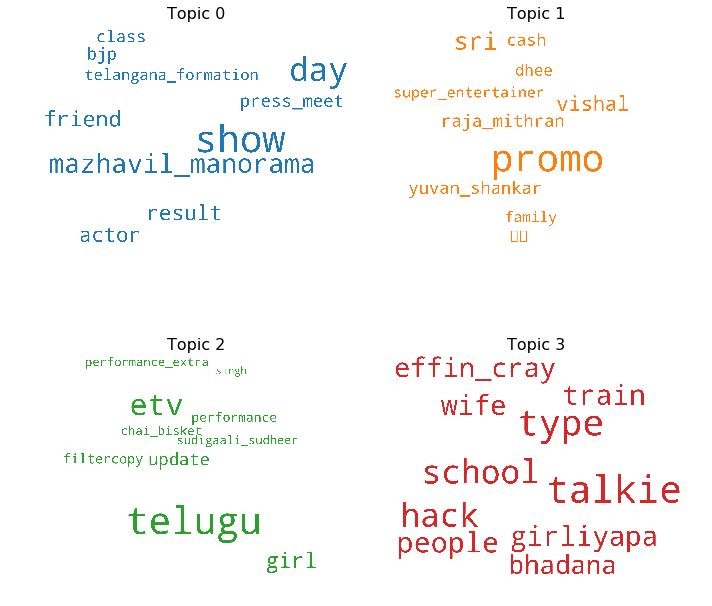

In [50]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()